In [76]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Loading the datasets

In [90]:
movies = pd.read_table('./data/movie.metadata.tsv', header=None)
movies.columns = ['Wikipedia movie ID',
                  'Freebase movie ID',
                  'Movie name',
                  'Movie release date',
                  'Movie box office revenue',
                  'Movie runtime',
                  'Movie languages',
                  'Movie countries',
                  'Movie genres']


In [91]:
characters = pd.read_table('./data/character.metadata.tsv', header=None)
characters.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date','Character name','Actor date of birth','Actor gender','Actor height (in meters)','Actor ethnicity (Freebase ID)','Actor name','Actor age at movie release','Freebase character/actor map ID','Freebase character ID','Freebase actor ID']
display(characters)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [92]:
characters.dropna(inplace=True)

In [5]:
personas=pd.read_csv('./data/personas.csv')
personas.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
personas

,char,movie,id,actor,persona
0,Jessica Rabbit,Who Framed Roger Rabbit,/m/02wszk9,Kathleen Turner,chanteuse
1,Tina Carlyle,The Mask,/m/0k5wls,Cameron Diaz,chanteuse
2,Susie Diamond,The Fabulous Baker Boys,/m/0k50tl,Michelle Pfeiffer,chanteuse
3,Sugar Kane Kowalczyk,Some Like It Hot,/m/0k3j8v,Marilyn Monroe,chanteuse
4,Dorothy Vallens,Blue Velvet,/m/0jvlc4,Isabella Rossellini,chanteuse
...,...,...,...,...,...
496,Lt. Commander Ron Hunter,Crimson Tide,/m/0jwsnp,Denzel Washington,father_to_his_men
497,Christopher Pike,Star Trek,/m/03ld2yg,Bruce Greenwood,father_to_his_men
498,Zordon,Mighty Morphin' Power Rangers: The Movie,/m/0k0nmw,Nicholas Bell,father_to_his_men
499,Wolfstan,Black Death,/m/0cg03cg,John Lynch,father_to_his_men


In [7]:
personas_per_actor=personas.groupby('actor')

In [8]:
persona_count_per_actor=pd.DataFrame(personas_per_actor.persona.nunique())

In [9]:
personas_per_actor.persona.nunique()

actor
Adam Sandler       2
Ade                1
Aidan Gillen       1
Al Pacino          2
Alex Karras        1
                  ..
Woody Harrelson    1
Zac Efron          1
Zachary Levi       1
Zack Ward          1
Zhang Ziyi         1
Name: persona, Length: 350, dtype: int64

<Axes: ylabel='Count'>

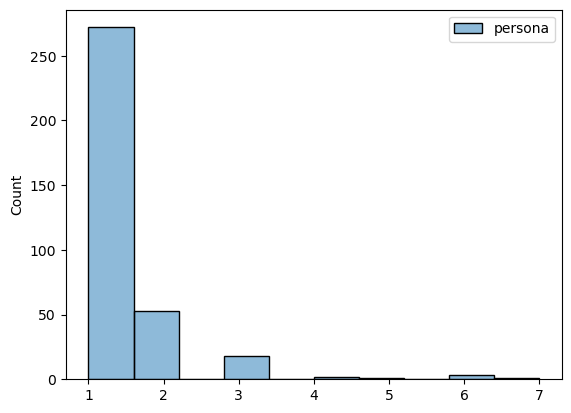

In [10]:
sns.histplot(persona_count_per_actor)

In [11]:
grouped_df = personas.groupby('actor')['persona'].agg(list).reset_index()

In [12]:
grouped_df[grouped_df['actor']=='Adam Sandler']

,actor,persona
0,Adam Sandler,"[warrior_poet, ditz, ditz, ditz]"


In [13]:
personas[personas['actor']=='Adam Sandler']

,char,movie,id,actor,persona
191,Zohan,You Don't Mess with the Zohan,/m/03hqx35,Adam Sandler,warrior_poet
321,Henry Roth,50 First Dates,/m/0jsll5,Adam Sandler,ditz
322,Michael Newman,Click,/m/0jwj2t,Adam Sandler,ditz
323,Chuck Levine,I Now Pronounce You Chuck and Larry,/m/02vbl__,Adam Sandler,ditz


In [14]:
movies

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [15]:
genres=characters.merge(movies[['Wikipedia movie ID', 'Movie name', 'Movie genres']], on='Wikipedia movie ID')[['Actor name', 'Movie genres']]

In [16]:
genres

,Actor name,Movie genres
0,Natasha Henstridge,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,Ice Cube,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
2,Pam Grier,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3,Matt Stone,"{""/m/0gf28"": ""Parody"", ""/m/0l4h_"": ""Mockumenta..."
4,Asia Argento,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
...,...,...
45259,Greta Garbo,"{""/m/07s9rl0"": ""Drama"", ""/m/01g6gs"": ""Black-an..."
45260,Mammootty,"{""/m/07s9rl0"": ""Drama""}"
45261,Prithviraj Sukumaran,"{""/m/07s9rl0"": ""Drama""}"
45262,Shriya Saran,"{""/m/07s9rl0"": ""Drama""}"


In [17]:
import json
genres['Movie genres'] = genres['Movie genres'].apply(lambda x: json.loads(x.replace('\/', '/')))

In [18]:
genres['first_genre'] = genres['Movie genres'].apply(lambda x: next(iter(x.values()), None))

In [19]:
genres

,Actor name,Movie genres,first_genre
0,Natasha Henstridge,"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Thriller
1,Ice Cube,"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Thriller
2,Pam Grier,"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Thriller
3,Matt Stone,"{'/m/0gf28': 'Parody', '/m/0l4h_': 'Mockumenta...",Parody
4,Asia Argento,"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Thriller
...,...,...,...
45259,Greta Garbo,"{'/m/07s9rl0': 'Drama', '/m/01g6gs': 'Black-an...",Drama
45260,Mammootty,{'/m/07s9rl0': 'Drama'},Drama
45261,Prithviraj Sukumaran,{'/m/07s9rl0': 'Drama'},Drama
45262,Shriya Saran,{'/m/07s9rl0': 'Drama'},Drama


In [20]:
genres_per_actor=genres.groupby('Actor name')

In [21]:
genres_per_actor.first_genre.nunique().sort_values(ascending=False)

Actor name
Anthony Quinn       33
John Wayne          32
Anthony Hopkins     31
Randy Quaid         30
Bob Hoskins         30
                    ..
Elizabeth Gracen     1
Miki Ishikawa        1
Saori Hara           1
Kel Mitchell         1
Edie Sedgwick        0
Name: first_genre, Length: 3320, dtype: int64

In [22]:
import plotly.express as px
df = genres_per_actor.first_genre.nunique().sort_values(ascending=False)
fig = px.histogram(df)
fig.show()

### Movies per country

In [23]:
movies.dropna(inplace=True)

In [24]:
movies_per_country=movies[['Wikipedia movie ID', 'Movie name', 'Movie countries', "Movie languages"]]

In [25]:
movies_per_country['Movie countries']=movies_per_country['Movie countries'].apply(lambda x: json.loads(x.replace('\/', '/')))

/var/folders/v2/nz9bnyf5155f3f5s543g9fhw0000gp/T/ipykernel_62479/1143919541.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
movies_per_country['Movie countries']=movies_per_country['Movie countries'].apply(lambda x: next(iter(x.values()), None))

/var/folders/v2/nz9bnyf5155f3f5s543g9fhw0000gp/T/ipykernel_62479/1276741014.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
movies_per_country_counts=movies_per_country.groupby('Movie countries').count()

In [28]:
movies_per_country_counts.head()

,Wikipedia movie ID,Movie name,Movie languages
Movie countries,,,
Afghanistan,1,1,1
Argentina,7,7,7
Australia,57,57,57
Austria,5,5,5
Belgium,7,7,7


In [29]:
import plotly.express as px
df = movies_per_country_counts
fig = px.scatter_geo(df)
fig.show()

In [30]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

In [31]:
movies_per_country_counts.reset_index(inplace=True)

In [32]:
movies_per_country_counts.head()


,Movie countries,Wikipedia movie ID,Movie name,Movie languages
0,Afghanistan,1,1,1
1,Argentina,7,7,7
2,Australia,57,57,57
3,Austria,5,5,5
4,Belgium,7,7,7


In [33]:
fig = px.scatter_geo(
    movies_per_country_counts,
    locations='Movie countries',
    size='Movie name',
    projection='natural earth',
    title='Movies Released per Country',
    color='Movie name',
    color_continuous_scale='Viridis',  # You can choose other color scales
    labels={'MoviesReleased': 'Number of Movies'},
)

# Show the interactive plot
fig.show()

In [34]:
import plotly.express as px
import pandas as pd

# Example DataFrame with the number of movies released per country
data = {
    'Country': ['USA', 'Canada', 'Mexico', 'Germany', 'France'],
    'MoviesReleased': [100, 50, 75, 30, 40]
}

df = pd.DataFrame(data)

# Plotly Express scatter_geo for a world map
fig = px.scatter_geo(
    df,
    locations='Country',
    size='MoviesReleased',
    projection='natural earth',
    title='Movies Released per Country',
    color='MoviesReleased',
    color_continuous_scale='Viridis',  # You can choose other color scales
    labels={'MoviesReleased': 'Number of Movies'},
)

# Show the interactive plot
fig.show()


## Personas 1

In [35]:
clusters=pd.read_xml('./generated_character_words_prettyprint_per_movie.xml')

In [36]:
from xml.dom import minidom


In [37]:
# parse an xml file by name
file = minidom.parse('generated_character_words_prettyprint_per_movie.xml')

In [38]:
# retrieve characters
characters = file.getElementsByTagName('character')

In [39]:
from tqdm import tqdm

In [40]:
# create vocabulary


vocabulary = {}

for character in tqdm(characters):
    for word in character.getElementsByTagName('word'):
        attr = word.getAttribute('name')
        lemma = word.firstChild.data.lower()
        
        t = (attr, lemma)

        if t in vocabulary.keys():
            vocabulary[t] += 1
        else:
            vocabulary[t] = 1

print('Size of vocabulary: {}'.format(len(vocabulary)))

vocabulary_keys = list(vocabulary.keys())

100%|██████████| 182489/182489 [00:03<00:00, 48197.56it/s]

Size of vocabulary: 51284


In [41]:
# generate bag of words for characters

def character_bow(words_list):
    bow = np.zeros(len(vocabulary_keys))
    for word in words_list:
        bow[vocabulary_keys.index(word)] += 1
    
    # do not standardize
    # bow = bow / bow.sum()
    return bow

In [42]:
from xml.dom import minidom

import numpy as np
import pandas as pd

import joblib

from sklearn.decomposition import LatentDirichletAllocation

from tqdm import tqdm

In [43]:
# retrieve bag of words for each characters to generate training set

X = np.zeros([len(characters), len(vocabulary_keys)])

for idx, character in enumerate(tqdm(characters)):

    words_list = []

    for word in character.getElementsByTagName('word'):
        attr = word.getAttribute('name')
        lemma = word.firstChild.data.lower()

        words_list.append((attr, lemma))

    bow = character_bow(words_list=words_list)

    X[idx] = bow

 74%|███████▍  | 134982/182489 [08:40<03:41, 214.86it/s]

: 

: 

In [ ]:
# instantiate latent dirichlet allocation model
lda = LatentDirichletAllocation(n_components=25, verbose=2, max_iter=10)

# train the model
lda.fit(X)

In [ ]:
# get the result of classification
prob = lda.transform(X)

print(prob.shape)

In [ ]:
joblib.dump(lda, 'lda_model_25.gz')

In [ ]:
df = {
    'name': [],
    'movie_id': [],
    'classification': [],
}

for idx, character in enumerate(tqdm(characters)):
    name = character.getElementsByTagName('name')[0].firstChild.data
    movie_id = character.getElementsByTagName('movie_id')[0].firstChild.data
    classification = np.argmax(prob[idx])

    df['name'].append(name)
    df['movie_id'].append(movie_id)
    df['classification'].append(classification)

df = pd.DataFrame(df)

## Personas 2

In [22]:
persona_file_path='./data/25.100.lda.log.txt'
proba_col=[f'proba_{p}' for p in range(1, 51)]
columns=['e.id','Wikipedia Movie id','Movie name', 'charName', 'fullName' , 'occurences', 'max', 'probas']


In [23]:
persona_proba=pd.read_csv(persona_file_path, sep='\t', header=None, names=columns)

In [27]:
persona_proba['probas'] = persona_proba['probas'].str.split()

In [29]:
persona_proba[proba_col] = pd.DataFrame(persona_proba['probas'].tolist(), dtype=float)

In [32]:
persona_proba = persona_proba.drop(columns=['probas'])

In [37]:
persona_proba

,e.id,Wikipedia Movie id,Movie name,charName,fullName,occurences,max,proba_1,proba_2,proba_3,...,proba_41,proba_42,proba_43,proba_44,proba_45,proba_46,proba_47,proba_48,proba_49,proba_50
0,e7,10000053,The Trap,she,her,5,13,0.0,0.02,0.02,...,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.0,0.01,0.00
1,e8,10000053,The Trap,she,her,5,12,0.0,0.12,0.07,...,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.00
2,e12,10000053,The Trap,he,his,7,41,0.0,0.01,0.02,...,0.0,0.53,0.0,0.0,0.0,0.0,0.13,0.0,0.00,0.01
3,e19,10000053,The Trap,she,her,6,1,0.0,0.65,0.04,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
4,e4,10000053,The Trap,Eve,Eve,11,23,0.0,0.13,0.05,...,0.0,0.00,0.0,0.0,0.0,0.0,0.11,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178729,e11,99984,Una Aventura Llamada Menudo,Concepci,Danny Concepci,3,12,0.0,0.01,0.14,...,0.0,0.00,0.0,0.0,0.0,0.0,0.13,0.0,0.00,0.04
178730,e10,99984,Una Aventura Llamada Menudo,he,the son of C sar Concepci n Jr.,4,23,0.0,0.02,0.07,...,0.0,0.00,0.0,0.0,0.0,0.0,0.08,0.0,0.00,0.01
178731,e1,99984,Una Aventura Llamada Menudo,they,their,6,35,0.0,0.01,0.21,...,0.0,0.01,0.0,0.0,0.0,0.0,0.06,0.0,0.00,0.01
178732,e0,9999280,Plaza de Almas,he,his,6,2,0.0,0.00,0.87,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00


In [42]:
persona_proba[['e.id', 'Wikipedia Movie id',]+proba_col]

,e.id,Wikipedia Movie id,proba_1,proba_2,proba_3,proba_4,proba_5,proba_6,proba_7,proba_8,...,proba_41,proba_42,proba_43,proba_44,proba_45,proba_46,proba_47,proba_48,proba_49,proba_50
0,e7,10000053,0.0,0.02,0.02,0.00,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.0,0.01,0.00
1,e8,10000053,0.0,0.12,0.07,0.01,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.00
2,e12,10000053,0.0,0.01,0.02,0.02,0.0,0.01,0.03,0.0,...,0.0,0.53,0.0,0.0,0.0,0.0,0.13,0.0,0.00,0.01
3,e19,10000053,0.0,0.65,0.04,0.00,0.0,0.01,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
4,e4,10000053,0.0,0.13,0.05,0.01,0.0,0.01,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.11,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178729,e11,99984,0.0,0.01,0.14,0.04,0.0,0.02,0.04,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.13,0.0,0.00,0.04
178730,e10,99984,0.0,0.02,0.07,0.15,0.0,0.00,0.12,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.08,0.0,0.00,0.01
178731,e1,99984,0.0,0.01,0.21,0.05,0.0,0.00,0.03,0.0,...,0.0,0.01,0.0,0.0,0.0,0.0,0.06,0.0,0.00,0.01
178732,e0,9999280,0.0,0.00,0.87,0.02,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00


In [68]:
persona_proba['e.id'].apply(lambda x: x.startswith('/m'))
persona_proba_filtered=persona_proba.loc[persona_proba['e.id'].apply(lambda x: x.startswith('/m'))
]

In [70]:
persona_proba_filtered.reset_index(inplace=True)

In [74]:
persona_proba_filtered=persona_proba_filtered.drop(['index'], axis=1)

In [52]:
persona_proba[proba_col].iloc[0].argmax()
persona_proba[proba_col].iloc[0].index[13]

13

In [78]:
from tqdm import tqdm
max_proba = []
for i in tqdm(range(persona_proba_filtered.shape[0])):
    row = persona_proba_filtered[proba_col].iloc[i] 
    max_idx = row.argmax()   
    max_proba.append(row.index[max_idx])

100%|██████████| 38470/38470 [13:13<00:00, 48.50it/s]


In [79]:
persona_proba_filtered['Persona']=max_proba

In [82]:
persona_df=persona_proba_filtered.drop(proba_col, axis=1)


In [87]:
persona_df['Persona']=persona_df['Persona'].apply(lambda x: x.split('_')[1])

In [88]:
persona_df

,e.id,Wikipedia Movie id,Movie name,charName,fullName,occurences,max,Persona
0,/m/02vcl4m,10004330,Halls of Montezuma,Pigeon Lane,Zelenko,5,35,36
1,/m/02tb80v,10004330,Halls of Montezuma,Lt. Col. Gilfillan,Gilfillan,3,35,36
2,/m/02vc485,10016740,Mela,Roopa Singh,her,21,3,4
3,/m/02tbjr0,10016740,Mela,Kishan Pyare,Kishan and Roopa,14,3,4
4,/m/02vd85q,10016740,Mela,Shankar Shane,Shankar,10,7,8
...,...,...,...,...,...,...,...,...
38465,/m/0k1xyw,999394,Pirates of the Caribbean: Dead Man's Chest,Cutler Beckett,"Lord Cutler Beckett , head of the East India T...",5,30,31
38466,/m/0k1xyk,999394,Pirates of the Caribbean: Dead Man's Chest,Joshamee Gibbs,Gibbs,5,30,31
38467,/m/02t9_fl,999394,Pirates of the Caribbean: Dead Man's Chest,Tia Dalma,Dalma,4,30,31
38468,/m/0k1xxy,999394,Pirates of the Caribbean: Dead Man's Chest,Elizabeth Swann,Elizabeth,8,30,31


### Merge with characters

In [107]:
merged=pd.merge(characters, persona_df, left_on=['Freebase character/actor map ID', 'Wikipedia movie ID'], right_on=['e.id', 'Wikipedia Movie id'])
merged

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,...,Freebase character ID,Freebase actor ID,e.id,Wikipedia Movie id,Movie name,charName,fullName,occurences,max,Persona
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,/m/0bgchn4,/m/0346l4,/m/0jys3m,975900,Ghosts of Mars,Lieutenant Melanie Ballard,Ballard,10,35,36
1,156558,/m/014k4y,2001-06-27,Yvette,1970-09-11,F,1.650,/m/0x67,Taraji P. Henson,30.0,...,/m/03jnxj_,/m/0blbxk,/m/0jtx5t,156558,Baby Boy,Yvette,her,23,46,47
2,156558,/m/014k4y,2001-06-27,Jody,1978-12-30,M,1.797,/m/0x67,Tyrese Gibson,22.0,...,/m/03jnxf4,/m/01l1b90,/m/0jtx5h,156558,Baby Boy,Jody,Jody and Yvette,31,4,5
3,156558,/m/014k4y,2001-06-27,Rodney,1971-10-20,M,1.918,/m/0x67,Snoop Dogg,29.0,...,/m/03jnx_2,/m/01vw8mh,/m/0jtx5n,156558,Baby Boy,Rodney,Rodney,18,41,42
4,156558,/m/014k4y,2001-06-27,Melvin,1959-05-12,M,1.830,/m/0x67,Ving Rhames,42.0,...,/m/03jnxcx,/m/032zg9,/m/03jnxct,156558,Baby Boy,Melvin,Melvin,3,35,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15886,6456053,/m/0g605h,1964-12-31,Paolo Maltese,1927-10-18,M,1.850,/m/02ctzb,George C. Scott,37.0,...,/m/0hnw0l3,/m/0l786,/m/04p4q_p,6456053,The Yellow Rolls-Royce,Paolo Maltese,his,4,40,41
15887,6456053,/m/0g605h,1964-12-31,Joey Friedlander,1918-11-04,M,1.770,/m/033tf_,Art Carney,46.0,...,/m/0hnw0k2,/m/015qt5,/m/0cg660g,6456053,The Yellow Rolls-Royce,Joey Friedlander,Friedlander,3,40,41
15888,22330502,/m/05sync6,1931-01-31,Yvonne Valbret,1905-09-18,F,1.702,/m/06mvq,Greta Garbo,25.0,...,/m/0h2ppfw,/m/0h14h,/m/05tg4vb,22330502,Inspiration,Yvonne Valbret,Yvonne,5,49,50
15889,24997872,/m/09g6klx,2010-05-07,Raja,1951-09-07,M,1.780,/m/04mvp8,Mammootty,58.0,...,/m/0h27wx_,/m/02hkv5,/m/0gvytkx,24997872,Pokkiri Raja,Raja,Raja,8,40,41


In [117]:
# save the dataframe for personas

#merged.to_csv('persona_data.csv')

In [121]:
actor_persona_count=merged.groupby('Actor name').Persona.count()

In [123]:
actor_persona_count

Actor name
50 Cent             2
Aaliyah             1
Aamir Ali           1
Aamir Khan         23
Aamna Sharif        1
                   ..
Zooey Deschanel    14
Zoë Kravitz         1
Zsa Zsa Gábor       3
Zulfi Syed          1
Željko Ivanek       1
Name: Persona, Length: 2448, dtype: int64

<Axes: xlabel='Persona', ylabel='Count'>

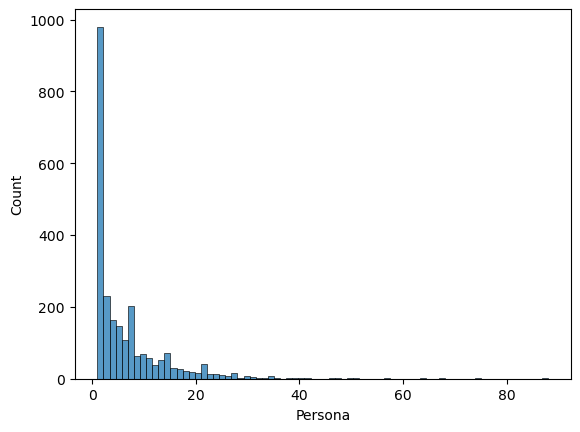

In [122]:
sns.histplot(actor_persona_count)

In [115]:
actor_persona_count.index[actor_persona_count.argmax()]

'Amitabh Bachchan'

In [146]:
df = merged.groupby('Persona')['Freebase actor ID'].count()
len(df)


50

In [136]:
import plotly.express as px
df = merged.groupby('Persona')['Freebase actor ID'].count()
#df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='Freebase actor ID', names='Freebase actor ID')
fig.show()

In [166]:
df.index

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '6', '7',
       '8', '9'],
      dtype='object', name='Persona')

<Axes: xlabel='Persona'>

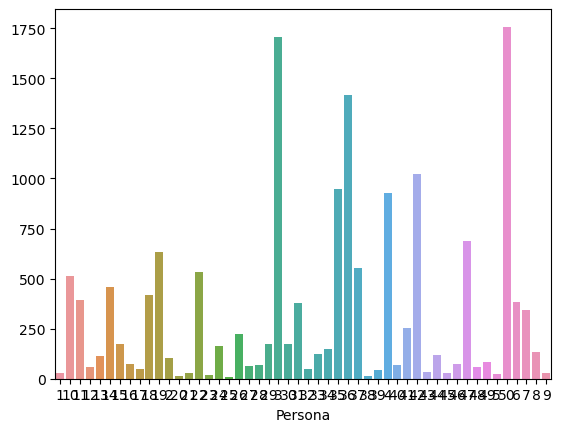

In [160]:
sns.barplot(x=df.index, y=df.values)